### Loading and importing necessary libs

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("Crop_recommendation.csv")

### Separting features & target variable

In [4]:
features=data[["N","P","K","ph","temperature","humidity","rainfall"]]
target=data["label"]
labels=data["label"]

### Splitting Training & Test Data

In [5]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(features,target,test_size=0.3,random_state=2)

In [6]:
LogReg=LogisticRegression(random_state=2)

In [7]:
LogReg.fit(Xtrain,Ytrain)

LogisticRegression(random_state=2)

In [8]:
predicted_values=LogReg.predict(Xtest)
predicted_values2=LogReg.predict(Xtrain)

### Model Evaluation

In [9]:
from sklearn import metrics

accuracy_score=metrics.accuracy_score(Ytest,predicted_values)
print("The accuracy score on TEST is:",accuracy_score)
accuracy_score2=metrics.accuracy_score(Ytrain,predicted_values2)
print("The accuracy score on TRAIN is:",accuracy_score2)

The accuracy score on TEST is: 0.9621212121212122
The accuracy score on TRAIN is: 0.9707792207792207


In [10]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

report=classification_report(Ytest,predicted_values)
print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.92      0.82      0.87        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.91      0.94      0.92        31
      grapes       1.00      1.00      1.00        29
        jute       0.86      0.94      0.90        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      1.00      0.96        32
       maize       0.94      0.91      0.92        32
       mango       0.97      1.00      0.99        33
   mothbeans       0.83      0.83      0.83        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        42
      papaya       0.97    

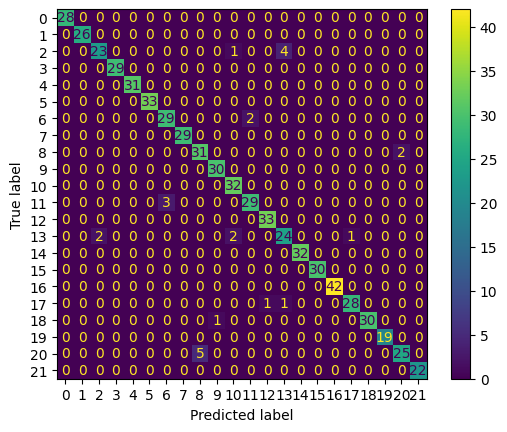

In [11]:
cf=ConfusionMatrixDisplay(confusion_matrix(Ytest,predicted_values))
p=cf.plot()


#### Applying Cross Validation

In [12]:
score = cross_val_score(LogReg,features,target,cv=5)
print(score)
print(score.mean())

[0.95       0.96590909 0.94772727 0.96818182 0.94318182]
0.9550000000000001


### Creating a predictive function

In [13]:
def predict_crop_label(input_features):
    
    
    input_features = np.array(input_features).reshape(1, -1) 
    
    # Predict the crop label using the LogReg model
    predicted_label = LogReg.predict(input_features)
    
    return predicted_label[0]  # Return the predicted label

# Example usage:
user_input = [83, 45, 60, 28, 70.3, 7.0, 150.9]  # Example input features (N, P, K, pH, temperature, humidity, rainfall)
predicted_crop_label = predict_crop_label(user_input)
print("Predicted Crop Label:", predicted_crop_label)

user_input = [104,18, 30, 23.603016, 60.3, 6.7, 140.91]  # Example input features (N, P, K, pH, temperature, humidity, rainfall)
predicted_crop_label = predict_crop_label(user_input)
print("Predicted Crop Label:", predicted_crop_label)


Predicted Crop Label: coffee
Predicted Crop Label: coffee


In [31]:
LR_accuracy=LogReg.score(Xtrain,Ytrain)
LR_accuracy

0.9707792207792207

### Train Accuracy: 0.9707792207792207
### Test Accuracy:  0.9621212121212122
### CV Accuracy  : 0.9550000000000001